In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as c

%matplotlib inline

# Use abundance tables to make an ISM gas-phase absorption curve

In [2]:
import abundances
import VY1995

In [3]:
# elements to use for this calculation
ELS = ['H', 'He', 'C', 'N', 'O', 'Ne', 'Na', 'Mg', 'Al', 'Si', \
       'P', 'S', 'Cl', 'Ar', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Co', 'Ni']

WAVEL = np.linspace(1.0, 2000.0, 5000) * u.angstrom
EGRID = WAVEL.to(u.keV, equivalencies=u.spectral())
#EGRID = np.linspace(0.01, 10.0, 1000) * u.keV

In [4]:
xsects = {ele:VY1995.compute_xsect(EGRID, abundances.Z[ele], 0) for ele in ELS}

In [5]:
total_xsect = np.zeros(len(EGRID)) * u.Mbarn
for ele in ELS:
    total_xsect += xsects[ele] * abundances.get_gas_abund(ele)

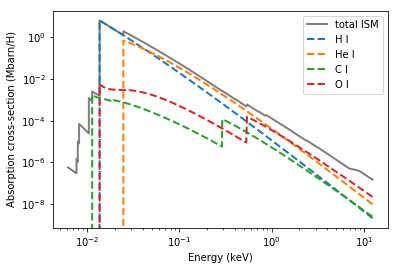

In [6]:
plt.plot(EGRID, total_xsect, lw=2, alpha=0.5, color='k', label='total ISM')

for ele in ['H', 'He', 'C', 'O']:
    plt.plot(EGRID, xsects[ele] * abundances.get_gas_abund(ele), 
             lw=2, ls='--', label='{} I'.format(ele))
    
plt.loglog()
plt.xlabel('Energy ({})'.format(EGRID.unit))
plt.ylabel('Absorption cross-section (Mbarn/H)')
plt.legend(loc='upper right')

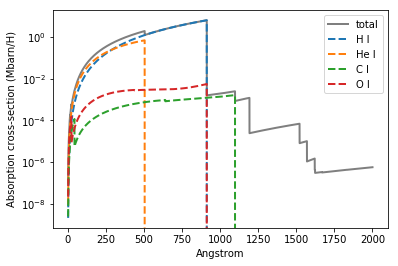

In [7]:
plt.plot(WAVEL, total_xsect, lw=2, alpha=0.5, color='k', label='total')

for ele in ['H', 'He', 'C', 'O']:
    plt.plot(WAVEL, xsects[ele] * abundances.get_gas_abund(ele), 
             lw=2, ls='--', label='{} I'.format(ele))
    
plt.semilogy()
plt.xlabel('{}'.format(WAVEL.unit))
plt.ylabel('Absorption cross-section (Mbarn/H)')
plt.legend(loc='upper right')